In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def simulate_cov_groups(p, num_groups, pcov_value=0.9):
    """Simulate covariance matrix"""
    # precision matrix
    theta = np.zeros((p, p))
    
    # correlation groups
    network_groups = np.array_split(np.arange(p), num_groups)
    for group in network_groups:
        i = group[0]
        for j in group[1:]:
            theta[i, j] = pcov_value
            theta[j, i] = pcov_value
            
    # make matrix positive definite (invertible) by adding to diagonal
    # https://nhigham.com/2021/02/16/diagonally-perturbing-a-symmetric-matrix-to-make-it-positive-definite/
    min_eig = np.linalg.eig(theta)[0].min()
    # the +1 to the diagonal makes matrix inversion a bit more numerically
    # stable (since the minimum eigenvalue is the lower bound)
    theta = theta + ((-min_eig+1) * np.eye(p))
    
    # then invert to get covariance matrix
    # this ensures sigma is PSD
    sigma = np.linalg.inv(theta)
            
    return theta, sigma

Text(0.5, 1, 'Covariance matrix')

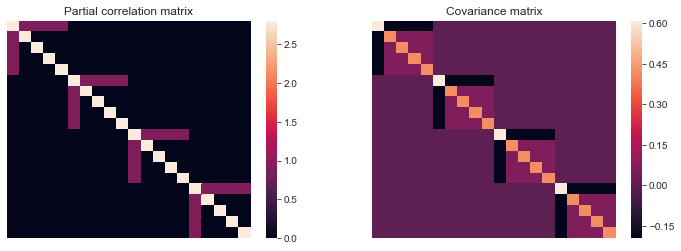

In [3]:
sns.set({'figure.figsize': (12, 4)})
fig, axarr = plt.subplots(1, 2)

theta_1, sigma_1 = simulate_cov_groups(20, 4)
sns.heatmap(theta_1, ax=axarr[0])
axarr[0].get_xaxis().set_visible(False)
axarr[0].get_yaxis().set_visible(False)
axarr[0].set_title('Partial correlation matrix')
sns.heatmap(sigma_1, ax=axarr[1])
axarr[1].get_xaxis().set_visible(False)
axarr[1].get_yaxis().set_visible(False)
axarr[1].set_title('Covariance matrix')

In [4]:
n = 1000
p = theta_1.shape[0]

# sample some data from MVN with the given covariance matrix
X = np.random.multivariate_normal(mean=np.zeros(p),
                                  cov=sigma_1,
                                  size=(n,),
                                  check_valid='warn')

# calculate covariance/precision matrix from data
sigma_hat = np.cov(X, rowvar=False)
theta_hat = np.linalg.inv(sigma_hat)

Text(0.5, 1, 'Partial correlations estimated from data')

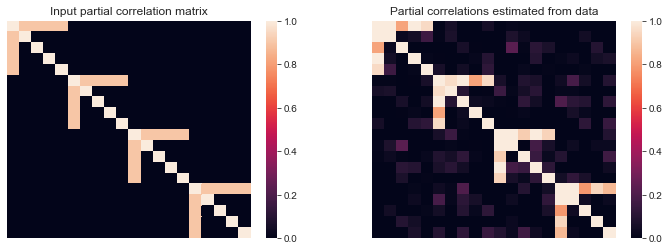

In [5]:
sns.set({'figure.figsize': (12, 4)})
fig, axarr = plt.subplots(1, 2)

theta_1[theta_1 > 1] = 1
theta_1[theta_1 < 0] = 0
theta_hat[theta_hat > 1] = 1
theta_hat[theta_hat < 0] = 0

sns.heatmap(theta_1, ax=axarr[0])
axarr[0].get_xaxis().set_visible(False)
axarr[0].get_yaxis().set_visible(False)
axarr[0].set_title('Input partial correlation matrix')
sns.heatmap(theta_hat, ax=axarr[1])
axarr[1].get_xaxis().set_visible(False)
axarr[1].get_yaxis().set_visible(False)
axarr[1].set_title('Partial correlations estimated from data')